In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

In [2]:
import seaborn as sns
data = sns.load_dataset("titanic")
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
data.shape

(891, 15)

In [7]:
duplicated_rows = data.duplicated()
duplicated_rows.sum()

107

In [8]:
# data.drop_duplicates(inplace=True)
new_data = data.drop_duplicates()
new_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [9]:
new_data.shape

(784, 15)

<function matplotlib.pyplot.show(close=None, block=None)>

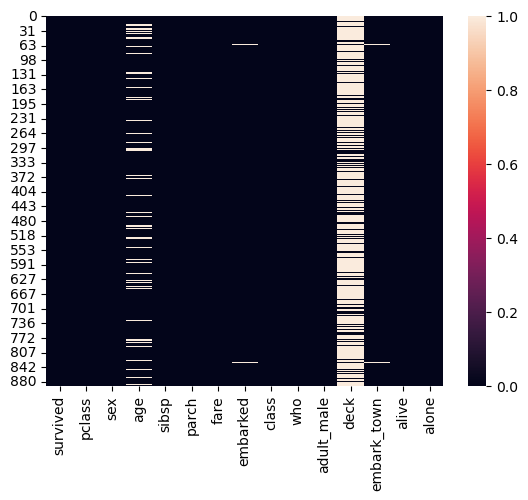

In [10]:
sns.heatmap(new_data.isna())
plt.show

In [11]:
new_data.isna().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
#to convert the missng values in percentage

data.isna().sum()/data.shape[0]*100

#percentage missing value in raw data

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [13]:
new_data.isna().sum()/new_data.shape[0]*100
#percentage of missing values or non values after the removal of duplicated rows.

survived        0.000000
pclass          0.000000
sex             0.000000
age            13.520408
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.255102
class           0.000000
who             0.000000
adult_male      0.000000
deck           74.234694
embark_town     0.255102
alive           0.000000
alone           0.000000
dtype: float64

### To drop a particular row

In [15]:
#we can use .dropna() fn where inplace = false is default which means that this change won't affect
# the original datasets
#that is it avoids accidental overwrites
#we can modify this into inplace = true, which modifies the original data



In [16]:
data1 = new_data.dropna()
data1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     181 non-null    int64   
 1   pclass       181 non-null    int64   
 2   sex          181 non-null    object  
 3   age          181 non-null    float64 
 4   sibsp        181 non-null    int64   
 5   parch        181 non-null    int64   
 6   fare         181 non-null    float64 
 7   embarked     181 non-null    object  
 8   class        181 non-null    category
 9   who          181 non-null    object  
 10  adult_male   181 non-null    bool    
 11  deck         181 non-null    category
 12  embark_town  181 non-null    object  
 13  alive        181 non-null    object  
 14  alone        181 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


In [18]:
data1.isna().sum()
#now we've removed all the null values from the dataset.

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [19]:
# data1.drop(columns = ["alive", "adult_male", "who"])

data = data1.drop(columns=['alive', 'adult_male', 'who'])
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,False
3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,False
6,0,1,male,54.0,0,0,51.8625,S,First,E,Southampton,True
10,1,3,female,4.0,1,1,16.7000,S,Third,G,Southampton,False
11,1,1,female,58.0,0,0,26.5500,S,First,C,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,D,Southampton,False
872,0,1,male,33.0,0,0,5.0000,S,First,B,Southampton,True
879,1,1,female,56.0,0,1,83.1583,C,First,C,Cherbourg,False
887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,True


### Splitting

In [21]:
num_df = data.select_dtypes(include="number")
cat_df = data.select_dtypes(include=["object_","boolean", "category"])


In [22]:
print("Numerical columns are")
num_cols = num_df.columns.tolist()
print(num_cols)

cat_cols = cat_df.columns.tolist()
print("Categorical columns are")
print(cat_cols)

Numerical columns are
['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
Categorical columns are
['sex', 'embarked', 'class', 'deck', 'embark_town', 'alone']


### Histogram

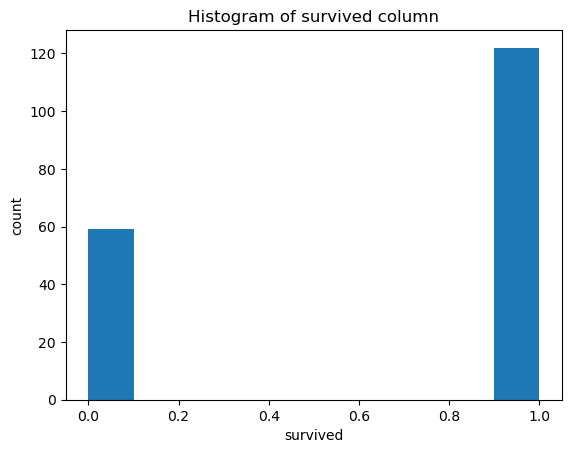

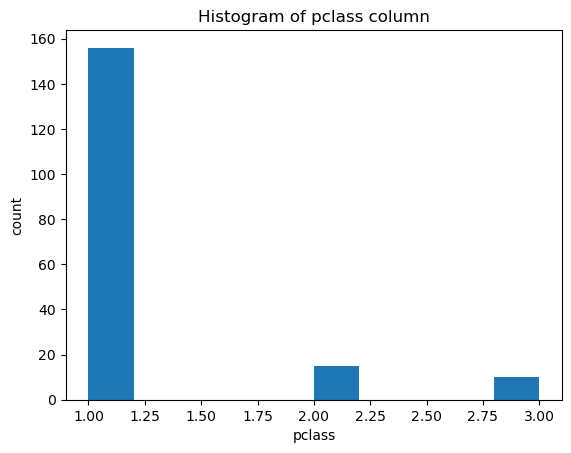

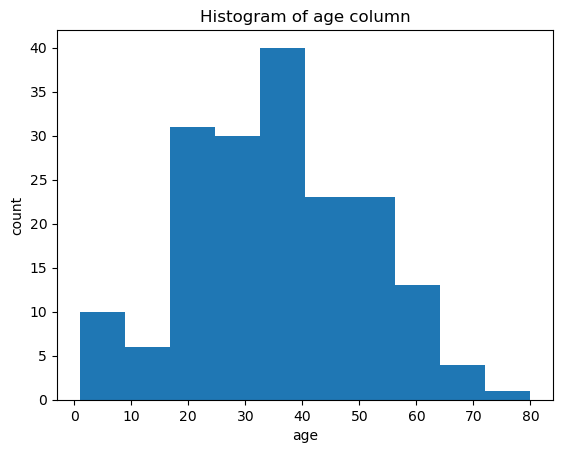

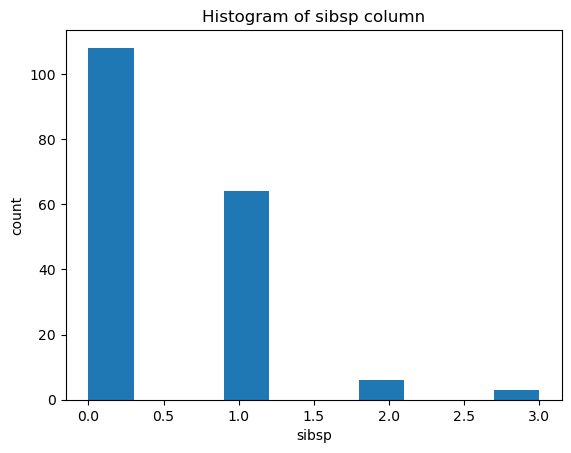

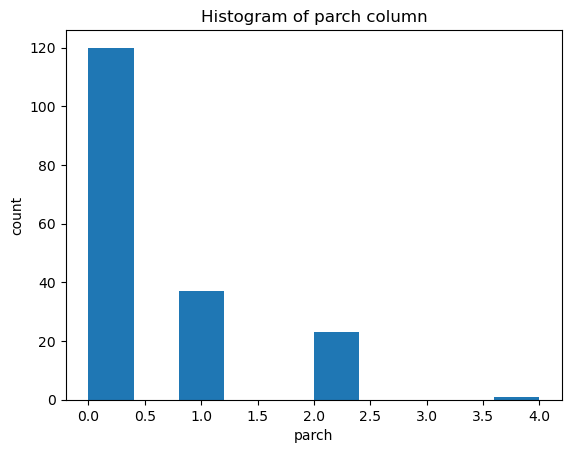

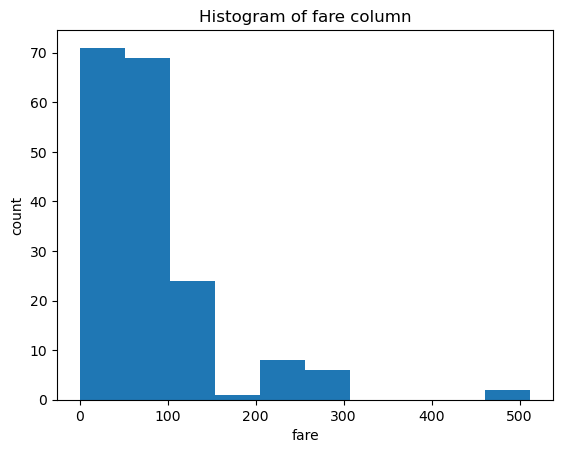

In [24]:
for col in num_cols:
  plt.hist(num_df[col])
  plt.title("Histogram of {} column".format(col))
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()

### Filling Missing Values

In [26]:
for col in num_cols:
  num_df[col] = num_df[col].fillna(num_df[col].median())

In [27]:
num_df.isna().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [28]:
for col in cat_cols:
    cat_df[col] = cat_df[col].fillna(cat_df[col].mode()[0])

In [29]:
cat_df.isna().sum()

sex            0
embarked       0
class          0
deck           0
embark_town    0
alone          0
dtype: int64

### Recombining

In [31]:
data = pd.concat([num_df, cat_df], axis=1)

In [32]:
data.isna().sum()

survived       0
pclass         0
age            0
sibsp          0
parch          0
fare           0
sex            0
embarked       0
class          0
deck           0
embark_town    0
alone          0
dtype: int64

### Duplicated values

In [34]:
dup_cols = data.columns.duplicated()

# Remove duplicate columns if any
data = data.loc[:, ~dup_cols]

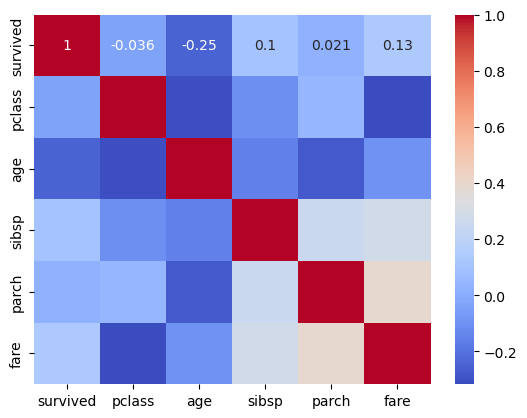

In [35]:
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.show()

### Outliers

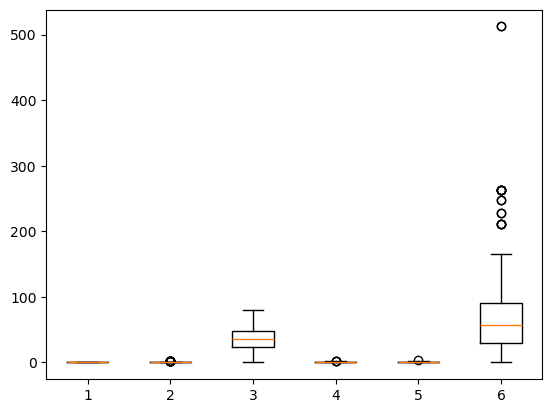

In [37]:
plt.boxplot(num_df)
plt.show()

In [38]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[column_name] = df[column_name].clip(upper=upper_bound)
    df[column_name] = df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [39]:
for col in num_cols:
  num_df[col] = remove_outliers(num_df, col)

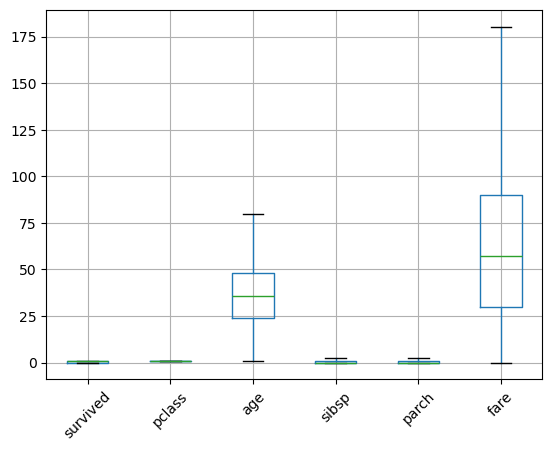

In [40]:
num_df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [41]:
data = pd.concat([num_df, cat_df], axis=1)

### DATA IMBALANCE

In [43]:
data['age'].value_counts()

age
36.0    11
24.0     8
19.0     6
35.0     6
31.0     5
        ..
71.0     1
3.0      1
1.0      1
36.5     1
26.0     1
Name: count, Length: 63, dtype: int64

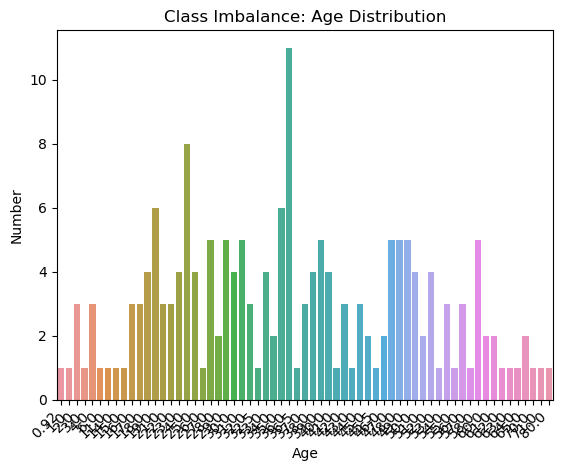

In [44]:
sns.countplot(x='age', data=data)
plt.title('Class Imbalance: Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number')
plt.xticks(rotation=45, ha='right')
plt.show()

In [45]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

X = data.drop('age', axis=1)
y = data['survived']
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# oversampler = RandomOverSampler(random_state=42)
# X_resampled, y_resampled = oversampler.fit_resample(X, y)

age
1    122
0    122
Name: count, dtype: int64


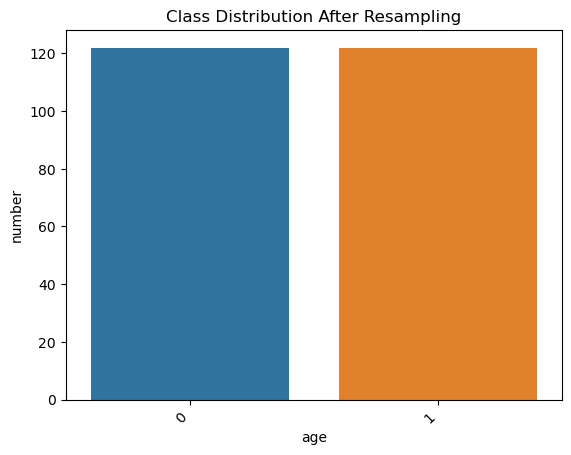

In [46]:
balanced_data = pd.DataFrame(X_resampled, columns=X.columns)
balanced_data['age'] = y_resampled

# Check the class distribution after resampling
print(balanced_data['age'].value_counts())


sns.countplot(x='age', data=balanced_data)
plt.title('Class Distribution After Resampling')
plt.xlabel('age')
plt.ylabel('number')
plt.xticks(rotation=45, ha='right')
plt.show()

In [52]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

label_enc=LabelEncoder()
data["embark_town_encoded"]=label_enc.fit_transform(data["embark_town"])
data

,survived,pclass,age,sibsp,parch,fare,sex,embarked,class,deck,embark_town,alone,embark_town_encoded
1,1,1,38.0,1.0,0.0,71.2833,female,C,First,C,Cherbourg,False,0
3,1,1,35.0,1.0,0.0,53.1000,female,S,First,C,Southampton,False,2
6,0,1,54.0,0.0,0.0,51.8625,male,S,First,E,Southampton,True,2
10,1,1,4.0,1.0,1.0,16.7000,female,S,Third,G,Southampton,False,2
11,1,1,58.0,0.0,0.0,26.5500,female,S,First,C,Southampton,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,47.0,1.0,1.0,52.5542,female,S,First,D,Southampton,False,2
872,0,1,33.0,0.0,0.0,5.0000,male,S,First,B,Southampton,True,2
879,1,1,56.0,0.0,1.0,83.1583,female,C,First,C,Cherbourg,False,0
887,1,1,19.0,0.0,0.0,30.0000,female,S,First,B,Southampton,True,2


In [56]:
label_enc=LabelEncoder()
data["sex_encoded"] = label_enc.fit_transform(data["sex"])
data

,survived,pclass,age,sibsp,parch,fare,sex,embarked,class,deck,embark_town,alone,embark_town_encoded,sex_encoded
1,1,1,38.0,1.0,0.0,71.2833,female,C,First,C,Cherbourg,False,0,0
3,1,1,35.0,1.0,0.0,53.1000,female,S,First,C,Southampton,False,2,0
6,0,1,54.0,0.0,0.0,51.8625,male,S,First,E,Southampton,True,2,1
10,1,1,4.0,1.0,1.0,16.7000,female,S,Third,G,Southampton,False,2,0
11,1,1,58.0,0.0,0.0,26.5500,female,S,First,C,Southampton,True,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,47.0,1.0,1.0,52.5542,female,S,First,D,Southampton,False,2,0
872,0,1,33.0,0.0,0.0,5.0000,male,S,First,B,Southampton,True,2,1
879,1,1,56.0,0.0,1.0,83.1583,female,C,First,C,Cherbourg,False,0,0
887,1,1,19.0,0.0,0.0,30.0000,female,S,First,B,Southampton,True,2,0


In [62]:
class_order = ["First", "Second", "Third"]

ordinal_enc = OrdinalEncoder(categories=[class_order])
data["class_encoded"]=ordinal_enc.fit_transform(data[["class"]])
data

,survived,pclass,age,sibsp,parch,fare,sex,embarked,class,deck,embark_town,alone,embark_town_encoded,sex_encoded,class_encoded
1,1,1,38.0,1.0,0.0,71.2833,female,C,First,C,Cherbourg,False,0,1.0,0.0
3,1,1,35.0,1.0,0.0,53.1000,female,S,First,C,Southampton,False,2,1.0,0.0
6,0,1,54.0,0.0,0.0,51.8625,male,S,First,E,Southampton,True,2,0.0,0.0
10,1,1,4.0,1.0,1.0,16.7000,female,S,Third,G,Southampton,False,2,1.0,2.0
11,1,1,58.0,0.0,0.0,26.5500,female,S,First,C,Southampton,True,2,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,47.0,1.0,1.0,52.5542,female,S,First,D,Southampton,False,2,1.0,0.0
872,0,1,33.0,0.0,0.0,5.0000,male,S,First,B,Southampton,True,2,0.0,0.0
879,1,1,56.0,0.0,1.0,83.1583,female,C,First,C,Cherbourg,False,0,1.0,0.0
887,1,1,19.0,0.0,0.0,30.0000,female,S,First,B,Southampton,True,2,1.0,0.0


In [70]:
color_onehot = pd.get_dummies(data["sex"])
color_onehot

,female,male
1,True,False
3,True,False
6,False,True
10,True,False
11,True,False
...,...,...
871,True,False
872,False,True
879,True,False
887,True,False


In [74]:
color_onehot = pd.get_dummies(data,columns=["sex"])
color_onehot.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,embark_town_encoded,sex_encoded,class_encoded,sex_female,sex_male
1,1,1,38.0,1.0,0.0,71.2833,C,First,C,Cherbourg,False,0,1.0,0.0,True,False
3,1,1,35.0,1.0,0.0,53.1000,S,First,C,Southampton,False,2,1.0,0.0,True,False
6,0,1,54.0,0.0,0.0,51.8625,S,First,E,Southampton,True,2,0.0,0.0,False,True
10,1,1,4.0,1.0,1.0,16.7000,S,Third,G,Southampton,False,2,1.0,2.0,True,False
11,1,1,58.0,0.0,0.0,26.5500,S,First,C,Southampton,True,2,1.0,0.0,True,False


In [76]:
color_onehot = pd.get_dummies(data,columns=["sex"], prefix="col", dtype=int, drop_first=True) 
color_onehot.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,embark_town_encoded,sex_encoded,class_encoded,col_male
1,1,1,38.0,1.0,0.0,71.2833,C,First,C,Cherbourg,False,0,1.0,0.0,0
3,1,1,35.0,1.0,0.0,53.1000,S,First,C,Southampton,False,2,1.0,0.0,0
6,0,1,54.0,0.0,0.0,51.8625,S,First,E,Southampton,True,2,0.0,0.0,1
10,1,1,4.0,1.0,1.0,16.7000,S,Third,G,Southampton,False,2,1.0,2.0,0
11,1,1,58.0,0.0,0.0,26.5500,S,First,C,Southampton,True,2,1.0,0.0,0


In [87]:
color_onehot = pd.get_dummies(data,columns=["alone"], dtype=int, drop_first=True)
color_onehot.head()

,survived,pclass,age,sibsp,parch,fare,sex,embarked,class,deck,embark_town,embark_town_encoded,sex_encoded,class_encoded,alone_encoded,alone_True
1,1,1,38.0,1.0,0.0,71.2833,female,C,First,C,Cherbourg,0,1.0,0.0,0,0
3,1,1,35.0,1.0,0.0,53.1000,female,S,First,C,Southampton,2,1.0,0.0,0,0
6,0,1,54.0,0.0,0.0,51.8625,male,S,First,E,Southampton,2,0.0,0.0,1,1
10,1,1,4.0,1.0,1.0,16.7000,female,S,Third,G,Southampton,2,1.0,2.0,0,0
11,1,1,58.0,0.0,0.0,26.5500,female,S,First,C,Southampton,2,1.0,0.0,1,1


In [97]:
new_data=data.drop(["embark_town","alone","sex","class"], axis=1)
new_data

,survived,pclass,age,sibsp,parch,fare,embarked,deck,embark_town_encoded,sex_encoded,class_encoded,alone_encoded
1,1,1,38.0,1.0,0.0,71.2833,C,C,0,1.0,0.0,0
3,1,1,35.0,1.0,0.0,53.1000,S,C,2,1.0,0.0,0
6,0,1,54.0,0.0,0.0,51.8625,S,E,2,0.0,0.0,1
10,1,1,4.0,1.0,1.0,16.7000,S,G,2,1.0,2.0,0
11,1,1,58.0,0.0,0.0,26.5500,S,C,2,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,47.0,1.0,1.0,52.5542,S,D,2,1.0,0.0,0
872,0,1,33.0,0.0,0.0,5.0000,S,B,2,0.0,0.0,1
879,1,1,56.0,0.0,1.0,83.1583,C,C,0,1.0,0.0,0
887,1,1,19.0,0.0,0.0,30.0000,S,B,2,1.0,0.0,1


In [107]:
label_enc=LabelEncoder()
data["embarked_encoded"] = label_enc.fit_transform(data["embarked"])
data
data.drop(["embarked","alone","sex","class","embark_town"],axis=1)

,survived,pclass,age,sibsp,parch,fare,deck,embark_town_encoded,sex_encoded,class_encoded,alone_encoded,embarked_encoded
1,1,1,38.0,1.0,0.0,71.2833,C,0,1.0,0.0,0,0
3,1,1,35.0,1.0,0.0,53.1000,C,2,1.0,0.0,0,2
6,0,1,54.0,0.0,0.0,51.8625,E,2,0.0,0.0,1,2
10,1,1,4.0,1.0,1.0,16.7000,G,2,1.0,2.0,0,2
11,1,1,58.0,0.0,0.0,26.5500,C,2,1.0,0.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,47.0,1.0,1.0,52.5542,D,2,1.0,0.0,0,2
872,0,1,33.0,0.0,0.0,5.0000,B,2,0.0,0.0,1,2
879,1,1,56.0,0.0,1.0,83.1583,C,0,1.0,0.0,0,0
887,1,1,19.0,0.0,0.0,30.0000,B,2,1.0,0.0,1,2


In [109]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std_scaler = StandardScaler()
data["age_std_scaled"] = std_scaler.fit_transform(data[["age"]])
data.head()

,survived,pclass,age,sibsp,parch,fare,sex,embarked,class,deck,embark_town,alone,embark_town_encoded,sex_encoded,class_encoded,alone_encoded,embarked_encoded,age_std_scaled
1,1,1,38.0,1.0,0.0,71.2833,female,C,First,C,Cherbourg,False,0,1.0,0.0,0,0,0.147792
3,1,1,35.0,1.0,0.0,53.1000,female,S,First,C,Southampton,False,2,1.0,0.0,0,2,-0.043930
6,0,1,54.0,0.0,0.0,51.8625,male,S,First,E,Southampton,True,2,0.0,0.0,1,2,1.170310
10,1,1,4.0,1.0,1.0,16.7000,female,S,Third,G,Southampton,False,2,1.0,2.0,0,2,-2.025058
11,1,1,58.0,0.0,0.0,26.5500,female,S,First,C,Southampton,True,2,1.0,0.0,1,2,1.425939


In [111]:
data.describe()

,survived,pclass,age,sibsp,parch,fare,embark_town_encoded,sex_encoded,class_encoded,alone_encoded,embarked_encoded,age_std_scaled
count,181.000000,181.0,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,1.810000e+02
mean,0.674033,1.0,35.687403,0.461326,0.472376,70.631377,1.281768,0.480663,0.193370,0.425414,1.281768,1.962825e-17
std,0.470035,0.0,15.691057,0.615672,0.725955,50.644043,0.956353,0.501012,0.517644,0.495777,0.956353,1.002774e+00
min,0.000000,1.0,0.920000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.221893e+00
25%,0.000000,1.0,24.000000,0.000000,0.000000,29.700000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.469110e-01
50%,1.000000,1.0,36.000000,0.000000,0.000000,57.000000,2.000000,0.000000,0.000000,0.000000,2.000000,1.997723e-02
75%,1.000000,1.0,48.000000,1.000000,1.000000,90.000000,2.000000,1.000000,0.000000,1.000000,2.000000,7.868655e-01
max,1.000000,1.0,80.000000,2.500000,2.500000,180.450000,2.000000,1.000000,2.000000,1.000000,2.000000,2.831901e+00


In [117]:
minmax_scaler = MinMaxScaler()
data["age_minmax_scaler"] = minmax_scaler.fit_transform(data[["age"]])
data.head()

,survived,pclass,age,sibsp,parch,fare,sex,embarked,class,deck,embark_town,alone,embark_town_encoded,sex_encoded,class_encoded,alone_encoded,embarked_encoded,age_std_scaled,age_minmax_scaler
1,1,1,38.0,1.0,0.0,71.2833,female,C,First,C,Cherbourg,False,0,1.0,0.0,0,0,0.147792,0.468892
3,1,1,35.0,1.0,0.0,53.1000,female,S,First,C,Southampton,False,2,1.0,0.0,0,2,-0.043930,0.430956
6,0,1,54.0,0.0,0.0,51.8625,male,S,First,E,Southampton,True,2,0.0,0.0,1,2,1.170310,0.671219
10,1,1,4.0,1.0,1.0,16.7000,female,S,Third,G,Southampton,False,2,1.0,2.0,0,2,-2.025058,0.038948
11,1,1,58.0,0.0,0.0,26.5500,female,S,First,C,Southampton,True,2,1.0,0.0,1,2,1.425939,0.721801


In [125]:
minmax_scaler = MinMaxScaler(feature_range=(5,7))
data["age_minmax_scaler"] = minmax_scaler.fit_transform(data[["age"]])
data.head()

,survived,pclass,age,sibsp,parch,fare,sex,embarked,class,deck,embark_town,alone,embark_town_encoded,sex_encoded,class_encoded,alone_encoded,embarked_encoded,age_std_scaled,age_minmax_scaler
1,1,1,38.0,1.0,0.0,71.2833,female,C,First,C,Cherbourg,False,0,1.0,0.0,0,0,0.147792,5.937785
3,1,1,35.0,1.0,0.0,53.1000,female,S,First,C,Southampton,False,2,1.0,0.0,0,2,-0.043930,5.861912
6,0,1,54.0,0.0,0.0,51.8625,male,S,First,E,Southampton,True,2,0.0,0.0,1,2,1.170310,6.342438
10,1,1,4.0,1.0,1.0,16.7000,female,S,Third,G,Southampton,False,2,1.0,2.0,0,2,-2.025058,5.077896
11,1,1,58.0,0.0,0.0,26.5500,female,S,First,C,Southampton,True,2,1.0,0.0,1,2,1.425939,6.443601
